# Predicting Heart Attack Risk Using Logistic Regression

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Preprocessing

In [4]:
# loading data file

data = pd.read_excel('data.xlsx')
df = data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# check for data structure, null values and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)
print("Number of duplicate rows ", df.duplicated().sum())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
Number of duplicate rows  1


In [8]:
# removing duplicate record

df_cleaned = df.drop_duplicates()

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

In [11]:
# Categorical Variables Analysis

categorical_cols = df[['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'target']].columns

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'sex':


sex
1    207
0     96
Name: count, dtype: int64

Value Counts for 'cp':


cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Value Counts for 'fbs':


fbs
0    258
1     45
Name: count, dtype: int64

Value Counts for 'restecg':


restecg
1    152
0    147
2      4
Name: count, dtype: int64

Value Counts for 'exang':


exang
0    204
1     99
Name: count, dtype: int64

Value Counts for 'slope':


slope
2    142
1    140
0     21
Name: count, dtype: int64

Value Counts for 'ca':


ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

Value Counts for 'thal':


thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

Value Counts for 'target':


target
1    165
0    138
Name: count, dtype: int64

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


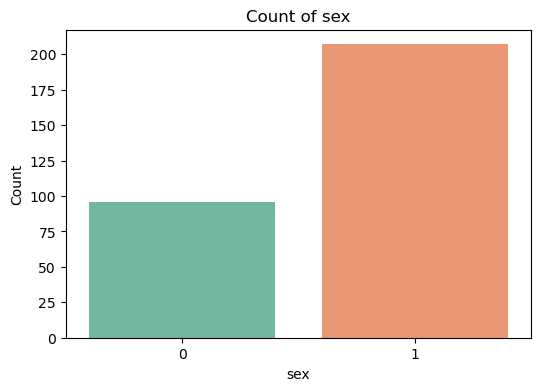

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


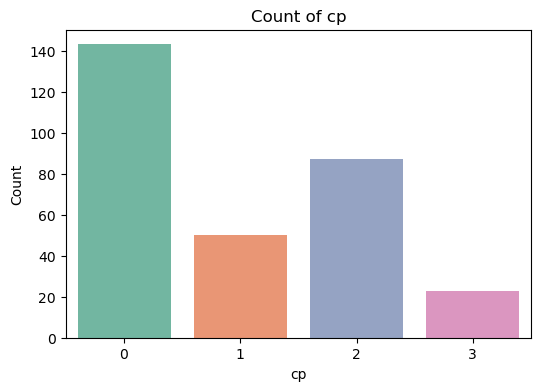

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


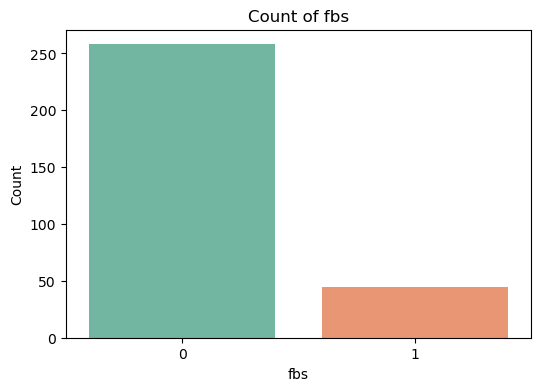

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


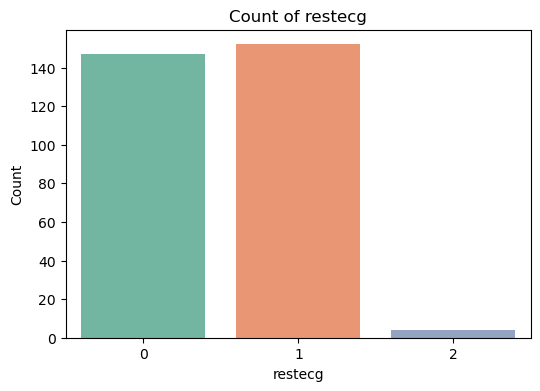

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


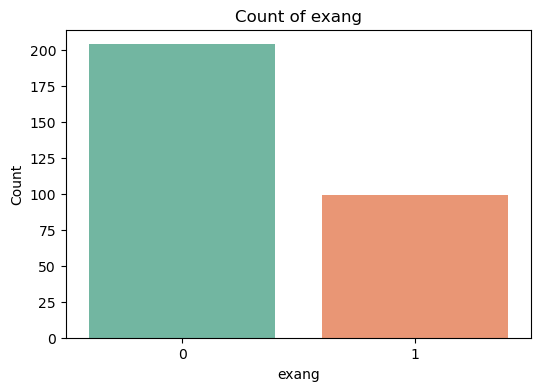

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


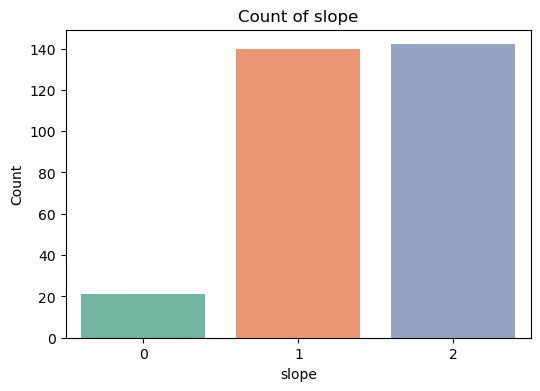

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


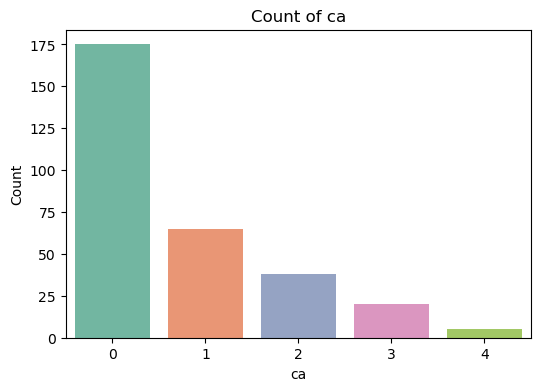

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


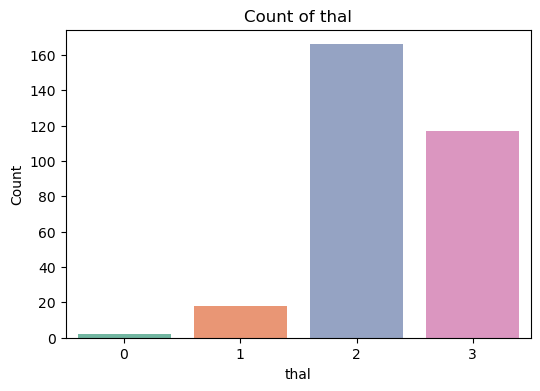

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\4247891202.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette='Set2')


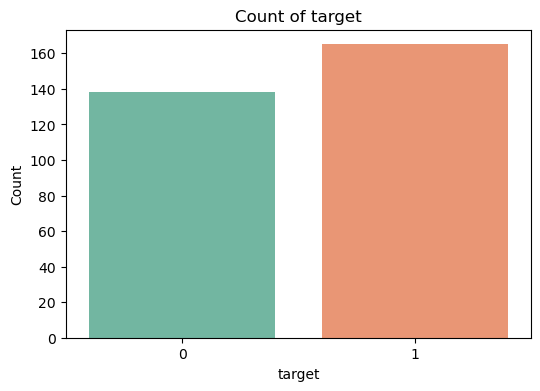

In [12]:
# Understand the distribution of categorical variables

categorical_cols = df[['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'target']].columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data = df, x = col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Check how cardiovascular disease (CVD) varies with age.

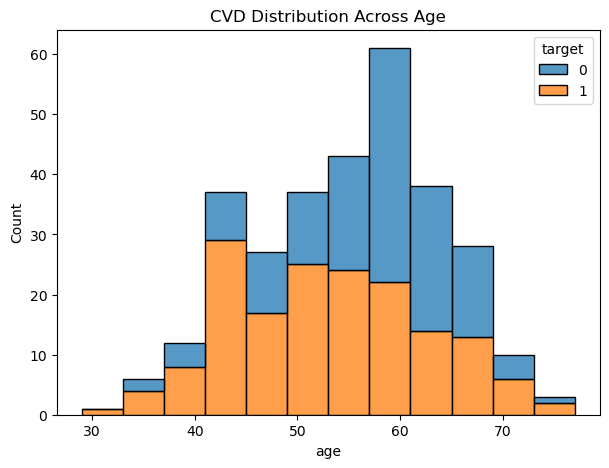

In [14]:
# Histogram of age grouped by target

plt.figure(figsize=(7, 5))
sns.histplot(data = df, x ='age', hue= 'target', multiple = 'stack')
plt.title('CVD Distribution Across Age')
plt.show()

Visualize how resting blood pressure (trestbps) varies with heart disease (target). Look for outliers or abnormal ranges.

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\334811556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'trestbps', y = 'target', palette = 'Pastel1')


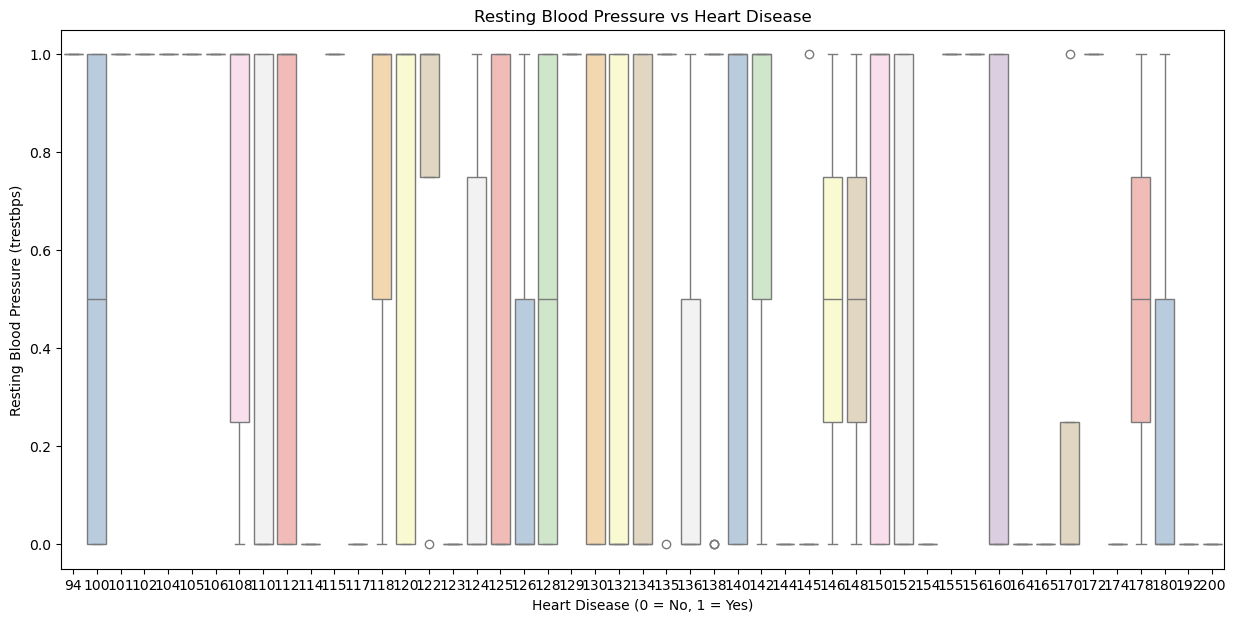

In [16]:
plt.figure(figsize=(15, 7))
sns.boxplot(data = df, x = 'trestbps', y = 'target', palette = 'Pastel1')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

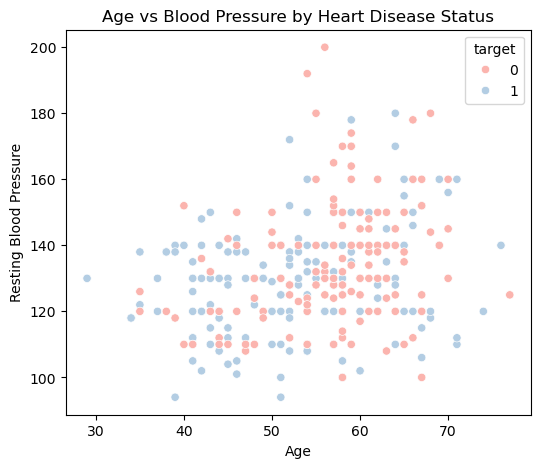

In [17]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data = df, y = 'trestbps', x = 'age',hue = 'target', palette = 'Pastel1')
plt.title('Age vs Blood Pressure by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

Explore the distribution of the "sex" variable and compare heart disease occurrence by gender.

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\2543580986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'sex', palette = 'Set3')


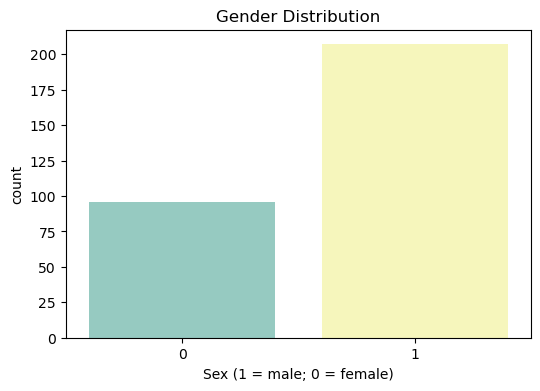

In [19]:
# Count of Gender

plt.figure(figsize=(6, 4))
sns.countplot(data = df, x = 'sex', palette = 'Set3')
plt.title('Gender Distribution')
plt.xlabel('Sex (1 = male; 0 = female)')
plt.show()

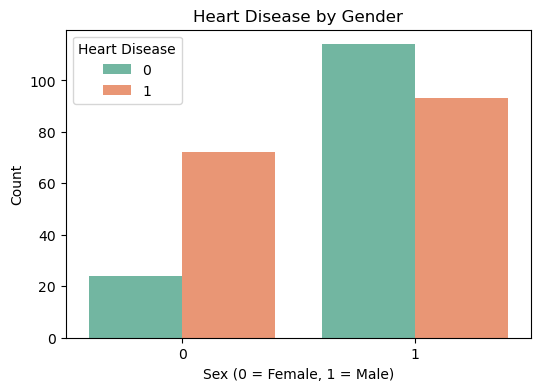

In [20]:
# Gender vs. Heart Disease

plt.figure(figsize=(6, 4))
sns.countplot(data = df, x = 'sex', hue = 'target', palette = 'Set2')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

Observations:

Age Analysis: Higher CVD incidence was observed in the age group 50+.

Resting Blood Pressure: Elevated resting BP showed some correlation with CVD, indicating its role as a potential early warning sign.

Gender Distribution: Males were more represented in the dataset and showed slightly higher CVD cases.

Deep EDA + Modeling

Visualize and compare cholesterol (chol) levels between people with and without heart disease (target).

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\558525392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'target', y= 'chol', palette = 'Set2')


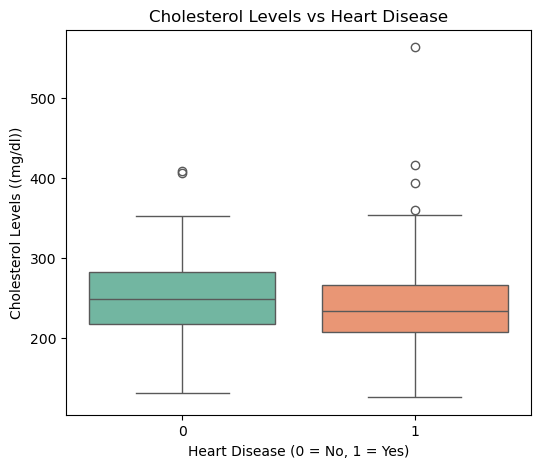

In [24]:
# Boxplot

plt.figure(figsize=(6,5))
sns.boxplot(data = df, x = 'target', y= 'chol', palette = 'Set2')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels ((mg/dl))')
plt.show()

Peak Exercise Analysis :

Analyze how exercise-related variables (oldpeak, exang, thalach) relate to heart disease.

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\1641419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'target', y= 'oldpeak', palette = 'coolwarm')


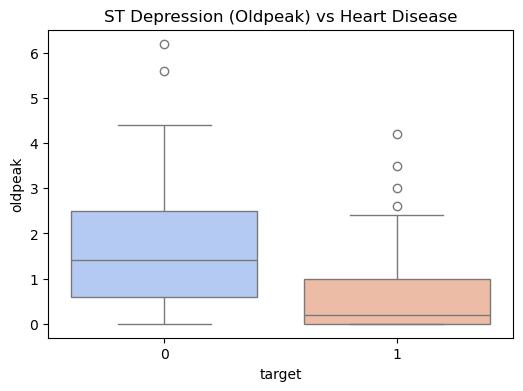

In [26]:
# oldpeak vs. target (Boxplot):

plt.figure(figsize=(6,4))
sns.boxplot(data = df, x = 'target', y= 'oldpeak', palette = 'coolwarm')
plt.title('ST Depression (Oldpeak) vs Heart Disease')
plt.show()

C:\Users\ajays\AppData\Local\Temp\ipykernel_22476\3141113264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'target', y= 'thalach', palette = 'spring')


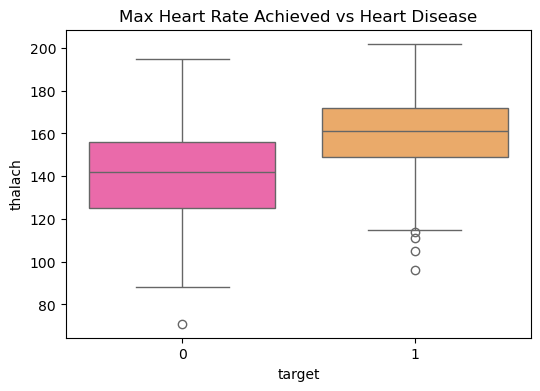

In [27]:
# thalach vs. target (Boxplot):

plt.figure(figsize=(6,4))
sns.boxplot(data = df, x = 'target', y= 'thalach', palette = 'spring')
plt.title('Max Heart Rate Achieved vs Heart Disease')
plt.show()

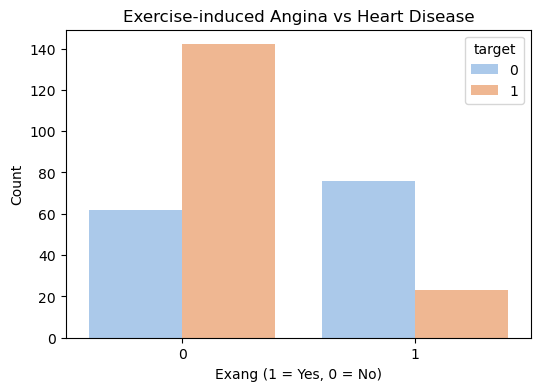

In [28]:
# exang vs. target (Countplot):

plt.figure(figsize=(6,4))
sns.countplot(data = df, hue = 'target', x= 'exang', palette = 'pastel')
plt.title('Exercise-induced Angina vs Heart Disease')
plt.xlabel('Exang (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

Thalassemia & Other Features

Objective:
Explore how thal is distributed and its relation to heart disease.

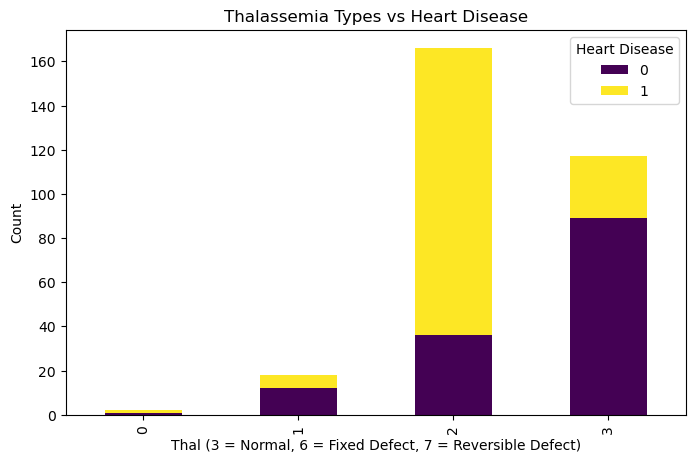

In [30]:
# Group by thal and target

thal_counts = df.groupby(['thal', 'target']).size().unstack()

thal_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title('Thalassemia Types vs Heart Disease')
plt.xlabel('Thal (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

Objective:
Visualize interactions between features and how well target classes separate.

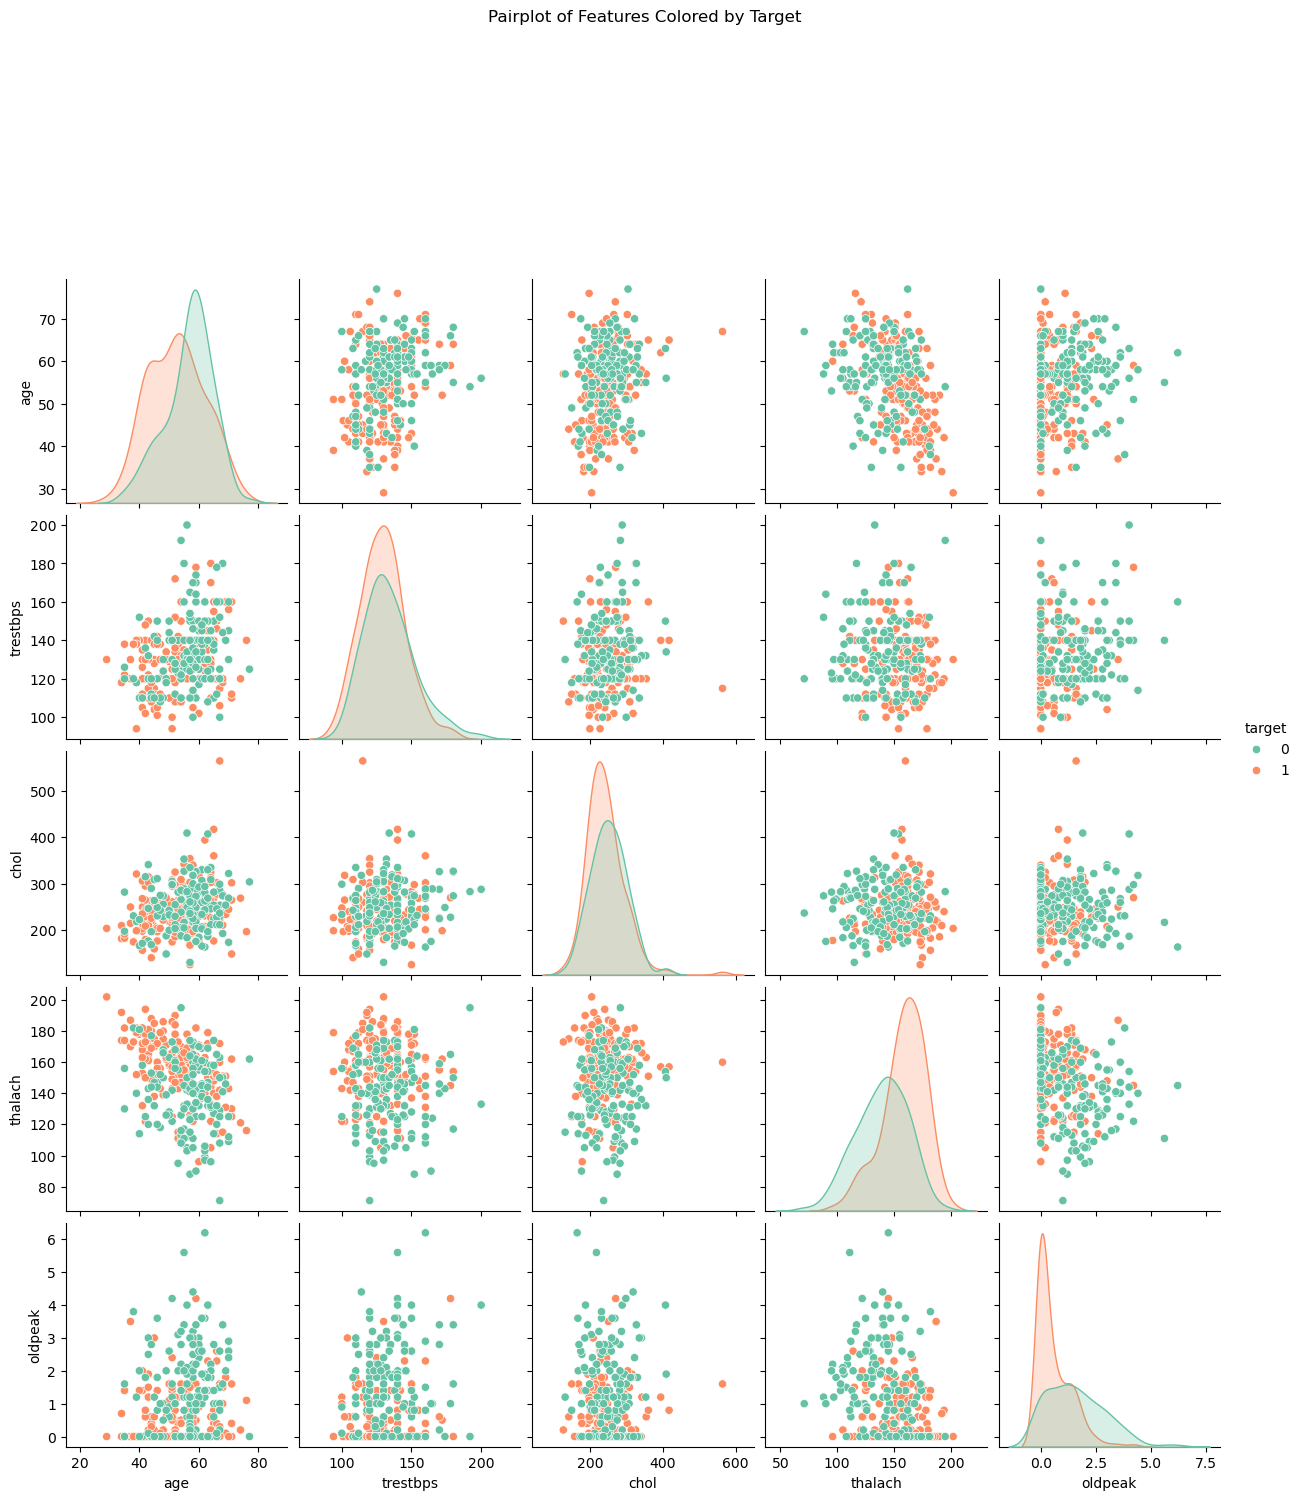

In [32]:
# Select numeric features + target (PAIRPLOT)

cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
df_subset = df[cols]

sns.pairplot(df_subset, hue = 'target', diag_kind = 'kde', palette='Set2')
plt.suptitle('Pairplot of Features Colored by Target', y=1.20)
plt.show()

Feature Relationships Observations:

Cholesterol Levels: High cholesterol was moderately associated with CVD, but not always conclusive on its own.

Exercise-Induced Angina (exang): Patients showing peak exercise abnormalities had increased CVD incidence.

Thalassemia: Certain types of thalassemia (e.g., fixed defect) showed stronger association with CVD, marking it as a significant predictor.

Pair plots revealed overlapping patterns between features and highlighted clusters relevant to CVD occurrence.

Logistic Regression

Objective:
Analyze how exercise-related variables (oldpeak, exang, thalach) relate to heart disease.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
# Load dataset

features = ['age', 'sex', 'cp', 'thalach', 'exang']
X = df[features]
y = df['target']

# split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create the model and train it 
model = LogisticRegression()
model.fit(X_train, y_train)

# make prediction on test data
y_pred = model.predict(X_test)

In [38]:
# Evaluate the model 

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuray :", accuracy)

Accuray : 0.819672131147541


In [39]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[24  5]
 [ 6 26]]


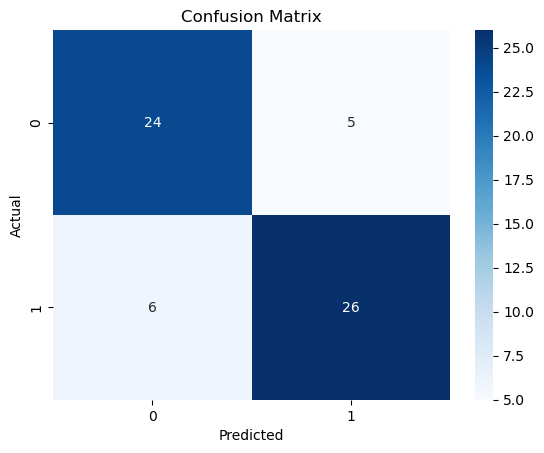

In [40]:
# Plot confusion matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Modeling:

Logistic Regression was used for classification.
Accuracy: 81.96%

Confusion Matrix:

True Positives: 26
True Negatives: 24
False Positives: 5
False Negatives: 6

Conclusion:
The logistic regression model demonstrates strong performance in predicting CVD. Key contributing features include age, exercise response, thalassemia type, and blood pressure. Further tuning and ensemble modeling may enhance accuracy.

# Import Tableau Dashboard

In [43]:
import matplotlib.image as mpimg

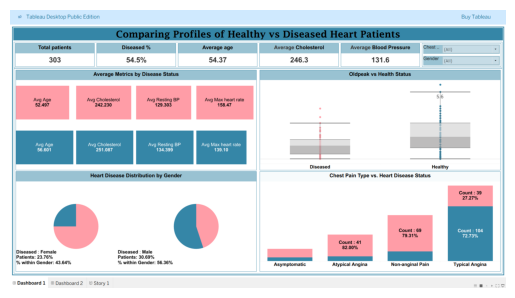

In [44]:
dashboard_1 = mpimg.imread('Dashboard_1.png')
plt.imshow(dashboard_1)
plt.axis('off')
plt.show()

# URL --> http://localhost:8888/lab/tree/Documents/Capstone%20Project/Healthcare_Project/Dataset/Dashboard_1.png?
# Downloadable link ==> http://localhost:8888/files/Documents/Capstone%20Project/Healthcare_Project/Dataset/Dashboard_1.png?_xsrf=2%7C2fe1224d%7Cf0c1fe831cfa6a8759c6870d600d13f3%7C1753526525

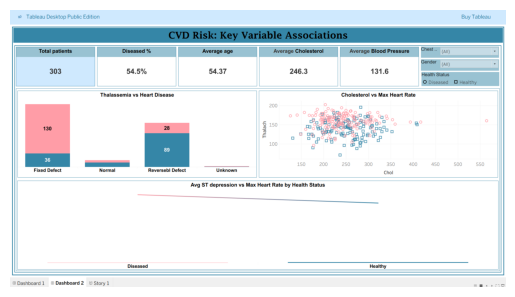

In [45]:
dashboard_2 = mpimg.imread('Dashboard_2.png')
plt.imshow(dashboard_2)
plt.axis('off')
plt.show()

# URL --> http://localhost:8888/lab/tree/Documents/Capstone%20Project/Healthcare_Project/Dataset/Dashboard_2.png
# Downloadable link ==>  http://localhost:8888/files/Documents/Capstone%20Project/Healthcare_Project/Dataset/Dashboard_2.png?_xsrf=2%7C2fe1224d%7Cf0c1fe831cfa6a8759c6870d600d13f3%7C1753526525